# Imports

In [1]:
!pip install mediapipe opencv-python

In [2]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

# On Image

<class 'numpy.ndarray'>
(600, 800, 3)


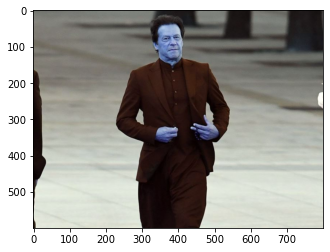

In [3]:
image = cv2.imread("IK.jpg")
print(type(image))
print(image.shape)

plt.imshow(image)

In [4]:
def calculate_angle(a,b,c):
    a = np.array(a) # First
    b = np.array(b) # Mid
    c = np.array(c) # End
    
    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)
    
    if angle >180.0:
        angle = 360-angle
        
    return angle 


right_shoulder:  (297, 178)

right_elbow:  (249, 303)

Angle:  24.75


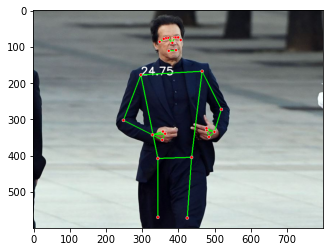

In [6]:
## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:

    # Recolor image to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False

    # Make detection
    results = pose.process(image)
    
    # Recolor back to BGR
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    
    
    landmarks = results.pose_landmarks.landmark
    
#     left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
#     print("left_shoulder: ", tuple(np.multiply(left_shoulder, [800, 600]).astype(int)))
#     print()
    right_hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]

    right_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
    print("right_shoulder: ", tuple(np.multiply(right_shoulder, [800, 600]).astype(int)))
    print()
    right_elbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
    print("right_elbow: ", tuple(np.multiply(right_elbow, [800, 600]).astype(int)))
    print()
    
    # Calculate angle
    angle = calculate_angle(right_hip, right_shoulder, right_elbow)
    angle = round(angle, 2)
    print("Angle: ", angle)
    
    # Visualize angle
    cv2.putText(image,
                str(angle),                           
                tuple(np.multiply(right_shoulder, [800, 600]).astype(int)), 
                cv2.FONT_HERSHEY_SIMPLEX,
                1,
                (255, 255, 255),
                2,
                cv2.LINE_AA  
               )
    
    # Render detections
    mp_drawing.draw_landmarks(image,
                              results.pose_landmarks,
                              mp_pose.POSE_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(0,0,255), thickness=2, circle_radius=2), 
                              mp_drawing.DrawingSpec(color=(0,255,0), thickness=2, circle_radius=2) 
                              )   
        
    

plt.imshow(image[...,::-1])

# On Video (Webcam)

In [ ]:
cap = cv2.VideoCapture(0)
## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark
            
            # Get coordinates
            shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
            
            # Calculate angle
            angle = calculate_angle(shoulder, elbow, wrist)
            angle = round(angle, 2)
            
            # Visualize angle
            cv2.putText(image, str(angle), 
                           tuple(np.multiply(elbow, [640, 480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA
                                )
                       
        except:
            pass
        
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               
        
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()